In [47]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn import neighbors
from sklearn import metrics

from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV




In [48]:
#Lecture des données
data = pd.read_excel("/home/congo/Bureau/2022-m1-staps/motives_part/data_motives_final.xlsx","haller") 

In [49]:
# mise a zero des valeurs manquantes
data = data.fillna(0)

#stoker le nom des colonnes
column_name = [c for c in data]

In [50]:
data = data.to_numpy()
data = data[:,39:]
nlin ,ncol =data.shape
print('data' ,data.shape)

data (1075, 71)


##                            Preprosseccing

In [51]:
# rendre toute les valeurs positives
data_correct = data
data = np.absolute(data)

In [52]:
#Supression des valeurs abérantes par rapport au seuil
seuil = 5*np.std(data,axis=0,dtype = np.float64)
#print(seuil)
data = np.array(data)
data_tmp = np.zeros_like(data)
data_tmp[data < seuil] = data[data < seuil]
data = data_tmp
#print(data)

In [53]:
#normalisation par ligne (avec ecartype nul) our avoir des valeurs entre 0 et 1

#indices à suprimer
max = np.max(data,axis = 1)
indices = [i for i, e in enumerate(max) if e == 0]
#print(indices)

#suppression des lignes
data_del = np.delete(data,indices,axis = 0)
data = data_del

#normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
min = np.min(data,axis = 1)
max = np.max(data,axis = 1)
data = (data-min[:,np.newaxis])/max[:,np.newaxis]

#print(data)


In [54]:
import pandas as pd
import openpyxl

In [55]:
# retour des valeurs négatives

#suppression des lignes
data_del = np.delete(data_correct,indices,axis = 0)
data_correct = data_del

#print("data before = ", data[data < 0])

#indices des valeurs négatives
indices_val_neg_i = np.where(data_correct < 0)
#print("indices_val_neg_i = ",indices_val_neg_i)

data[indices_val_neg_i] = -1*data[indices_val_neg_i]


#print("data after = ", data[data < 0] )
nlin ,ncol =data.shape

print(nlin,ncol)


1050 71


 Cluster Algorithm 

## 1) CAH algorithm 

In [236]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd 


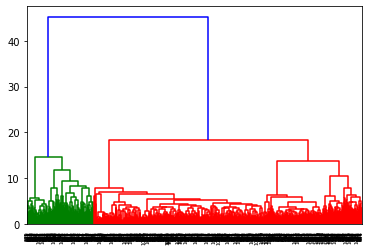

In [237]:
#create a dendrogram
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))

In [238]:
hc = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean',linkage='ward' )


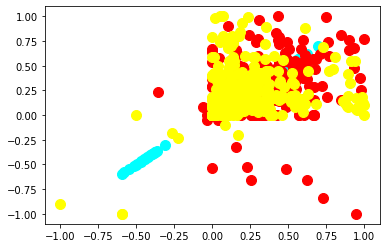

In [239]:
y_hc = hc.fit_predict(data)
plt.scatter(data[y_hc == 0,28],data[ y_hc == 0,28],s= 100,c = 'cyan')
plt.scatter(data[y_hc == 1,0],data[ y_hc == 1,1],s= 100,c = 'red')
plt.scatter(data[y_hc == 2,0],data[ y_hc == 2,1],s= 100,c = 'yellow')
plt.scatter(data[y_hc == 3,0],data[ y_hc == 3,1],s= 100,c = 'black')
plt.scatter(data[y_hc == 4,0],data[ y_hc == 4,1],s= 100,c = 'green')
plt.scatter(data[y_hc == 5,0],data[ y_hc == 5,1],s= 100,c = 'green')


## K-means

In [240]:
from sklearn.cluster import KMeans


Text(0, 0.5, ' Cout du modele inertia')

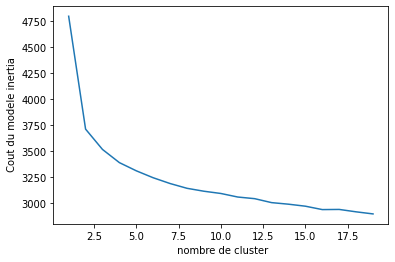

In [241]:
#nombre de cluster optimal 
# inertia calcule le cout (somme des distance entre les points d'un cluster et du centroide )
# methode shadow aur=tre indicateur
inertia =[]
K_range =range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(data)
    inertia.append(model.inertia_)


plt.plot(K_range,inertia)
plt.xlabel(" nombre de cluster")
plt.ylabel(" Cout du modele inertia")


# 2-6 clusters ? la zone de "coude"

Text(0.5, 0, " nombre d'étudiant")

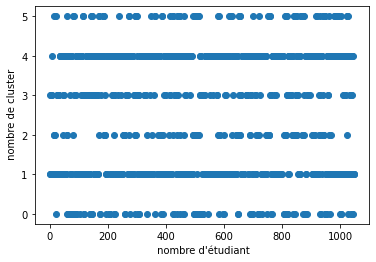

In [252]:
x_etudiant=range(0,nlin)

n_cluster = 6
model = KMeans(n_clusters= n_cluster)
y_pred = model.fit_predict(data)

KMean = KMeans(n_clusters= n_cluster).fit(data)
labels = KMean.labels_


plt.scatter(x_etudiant,y_pred)
plt.ylabel(" nombre de cluster")
plt.xlabel(" nombre d'étudiant")

In [253]:
from sklearn.metrics import davies_bouldin_score

In [254]:
print(davies_bouldin_score(data, labels))

3.2567015527101257


##                            Statistique Inférentielle sur chaque cluster 1

In [17]:
# mettre data en df
df_cluster = pd.DataFrame(data)

df_cluster_const = df_cluster.astype(float,errors='raise')
# renommer les colonne
df_cluster.columns = column_name[39:]
df_cluster_const.columns = column_name[39:]
#print(df_cluster.shape)

# # création d'une colonne cluster 
df_cluster['cluster'] = y_pred
# #print(df_cluster.shape)

In [18]:
# df_cluster.groupby('cluster').describe()

In [19]:

y_pred_0 = np.zeros(len(y_pred), dtype= int)
y_pred_1 = np.zeros(len(y_pred), dtype= int)
y_pred_2 = np.zeros(len(y_pred), dtype= int)
y_pred_3 = np.zeros(len(y_pred), dtype= int)
y_pred_4 = np.zeros(len(y_pred), dtype= int)
y_pred_5 = np.zeros(len(y_pred), dtype= int)

# print(y_pred[ y_pred == 5])

for i in range (len(y_pred)) :
    if ( y_pred[i] == 0) :
        y_pred_0[i] = 1 
    if ( y_pred[i] == 1) :
        y_pred_1[i] = 1 

    if ( y_pred[i] == 2) :
        y_pred_2[i] = 1 

    if ( y_pred[i] == 3) :
        y_pred_3[i] = 1 

    if ( y_pred[i] == 4) :
        y_pred_4[i] = 1 

    if ( y_pred[i] == 5) :
        y_pred_5[i] = 1
             
        
# print(y_pred_5[y_pred_5 == 1])

# # création d'une colonne cluster0 ,1 ,2  
df_cluster['cluster_0'] = y_pred_0
df_cluster['cluster_1'] = y_pred_1
df_cluster['cluster_2'] = y_pred_2
df_cluster['cluster_3'] = y_pred_3
df_cluster['cluster_4'] = y_pred_4
df_cluster['cluster_5'] = y_pred_5

# print(df_cluster.shape)


In [20]:
# 'Confiance en soi' par 'Confiance_en_soi'
# print(column_name[90])
column_name[90] = 'Confiance_en_soi'
# print(column_name[90])
df_cluster = df_cluster.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

# print(df_cluster['Confiance_en_soi'])

In [21]:
# df_cluster.info()
# probleme de type alors on le change
df_cluster = df_cluster.astype(float,errors='raise')
# df_cluster.info()

renommer les lignes ( remplacer 0 par etudiant0)

In [22]:
line_name = ['etudiant' + str(i) for i in range(nlin)]
# print(line_name)
df_cluster.index = line_name
df_cluster_const.index = line_name
# print(df_cluster)

In [23]:
with pd.ExcelWriter('test.xlsx') as writer:
    df_cluster.to_excel(writer, freeze_panes=(1,1))

In [24]:
# Çağatay Demiralp <cagatay@cs.stanford.edu>

In [25]:
import statsmodels.formula.api as smf


In [26]:
# "cluster_0 ~ detente + Confort + .... "

List_qualif = column_name[39:]
chaine = "cluster_0 ~ "
for qualif in List_qualif : # pour chaque qualité 
    chaine += '+'
    chaine +=  str(qualif) 

# print(chaine)

In [27]:

model = smf.ols(chaine, data=df_cluster).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              cluster_0   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     9.132
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.15e-68
Time:                        17:28:38   Log-Likelihood:                 19.656
No. Observations:                1050   AIC:                             104.7
Df Residuals:                     978   BIC:                             461.6
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1804      0.021  

##   autres

In [72]:
# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus)

In [73]:
#cluster 0
indices_cluster_0 = np.where(data[y_pred == 0])
cluster_0 = data[y_pred == 0]

# retour du df
df_0 = pd.DataFrame(cluster_0)
# prendre la valeur absolute pour éviter la compensation
df_0 = np.absolute(df_0)
df_0.columns = column_name[39:]
#print(df_0)

# trier par somme de toutes les colonnes
sum_colonne_0 = df_0.sum()
print(sum_colonne_0)

Confort           1.976577
Securite          2.961201
Qualite           2.652902
Force             1.853212
Maintien          1.847638
                    ...   
Role              3.036756
Performance       2.006535
Meilleur          2.626739
Individualiste    2.489019
detente           2.654854
Length: 71, dtype: float64


## Tester la solidité de chaque cluster

In [120]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/data_motives/clustering.csv") 

In [121]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [122]:
df.head()

,cluster3,cluster4,cluster5,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,...,Serenite,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente
0,1,1,1,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,...,0.015611,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582
1,2,3,4,0.978229,0.256652,0.370343,0.252782,0.323174,0.327528,0.252540,...,0.017417,0.015723,0.019110,0.021287,0.021529,0.018868,0.021287,0.017900,0.024432,0.017658
2,1,1,1,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,...,0.013713,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676
3,1,2,2,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,...,0.136636,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696
4,1,1,1,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,...,0.121065,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777


In [123]:
df_colonne = df.columns[ 3:]

données Train et validation

In [124]:
y_3 = df.loc[:,'cluster3']
y_4 = df.loc[:,'cluster4']
y_5 = df.loc[:,'cluster5']

In [170]:
X = df
X.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

<class 'pandas.core.frame.DataFrame'>


In [126]:

nelem = len(df)
X_train, X_test , y_train_3, y_test_3 = train_test_split (X,y_3, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)
X_train_4, X_test_4 , y_train_4, y_test_4 = train_test_split (X,y_4, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)
X_train_5, X_test_5 , y_train_5, y_test_5 = train_test_split (X,y_5, train_size = int(nelem*(2/3)), test_size = int(nelem*(1/3)),random_state = 0)



In [129]:
logreg = LogisticRegression()
logreg_4 = LogisticRegression()
logreg_5 = LogisticRegression()
logreg.fit(X_train,y_train_3)
logreg_4.fit(X_train_4,y_train_4)
logreg_5.fit(X_train_5,y_train_5)

LogisticRegression()

In [130]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
from sklearn import metrics

knn.fit(X_train,y_train_3)
y_pred_3_knn = knn.predict(X_test)
print( metrics.accuracy_score(y_test_3,y_pred_3_knn))

confusion = metrics.confusion_matrix(y_test_3, y_pred_3_knn)
print('confusion  \n' ,confusion)

0.9428571428571428
confusion  
 [[242   0   1]
 [ 14  22   0]
 [  4   1  66]]


In [131]:
# prediction pour le donner val
y_pred_3_class = logreg.predict(X_test)
y_pred_4_class = logreg.predict(X_test_4)
y_pred_5_class = logreg.predict(X_test_5)

calcul de l'accuracy

In [132]:

print( metrics.accuracy_score(y_test_3,y_pred_3_class))
print( metrics.accuracy_score(y_test_4,y_pred_4_class))
print( metrics.accuracy_score(y_test_5,y_pred_5_class))

0.9657142857142857
0.31142857142857144
0.2542857142857143


In [133]:
# comparer true and predicted response values
print('True' , y_test_3.values[0:25])
print('True 4' , y_test_4.values[0:25])
print('True 5 ' , y_test_5.values[0:25])
# y_pred_3_class  = y_pred_3_class.to_numpy()

print('Pred' , y_pred_3_class[0:25])
print('Pred 4 ' , y_pred_4_class[0:25])
print('Pred 5 ' , y_pred_5_class[0:25])

True [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
True 4 [2 4 1 1 4 1 1 2 1 4 2 4 3 2 1 1 4 1 2 3 2 2 2 1 2]
True 5  [2 5 1 1 5 1 1 2 1 5 2 5 4 2 1 1 5 1 2 4 2 2 2 1 2]
Pred [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
Pred 4  [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]
Pred 5  [1 3 1 1 3 1 1 1 1 3 1 3 2 1 1 1 3 1 1 2 1 1 1 1 1]


In [134]:
confusion = metrics.confusion_matrix(y_test_3, y_pred_3_class)
confusion_4 = metrics.confusion_matrix(y_test_4, y_pred_4_class)
confusion_5  = metrics.confusion_matrix(y_test_5, y_pred_5_class)
print('confusion  \n' ,confusion)
print('confusion 4 \n' ,confusion_4)
print('confusion 5 \n' ,confusion_5)

confusion  
 [[237   5   1]
 [  4  32   0]
 [  2   0  69]]
confusion 4 
 [[106   2   0   0]
 [131   3   1   0]
 [  4  32   0   0]
 [  2   0  69   0]]
confusion 5 
 [[ 86   0   0   0   0]
 [131   3   1   0   0]
 [ 20   2   0   0   0]
 [  4  32   0   0   0]
 [  2   0  69   0   0]]


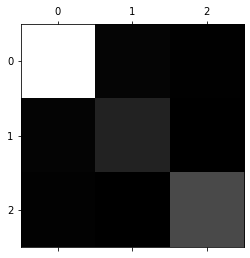

In [135]:
plt.matshow(confusion, cmap=plt.cm.gray)
plt.show()

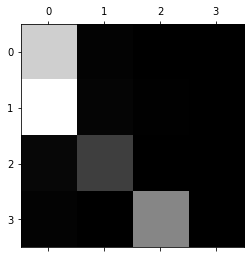

In [136]:
plt.matshow(confusion_4, cmap=plt.cm.gray)
plt.show()

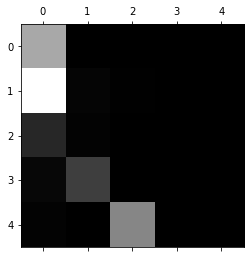

In [137]:
plt.matshow(confusion_5, cmap=plt.cm.gray)
plt.show()

In [138]:
print( 'recall_score : ',metrics.recall_score(y_test_3, y_pred_3_class,average=None))
print( 'recall_score 4 : ' ,metrics.recall_score(y_test_4, y_pred_4_class,average=None))
print( 'recall_score 5 : ' ,metrics.recall_score(y_test_5, y_pred_5_class,average=None))

recall_score :  [0.97530864 0.88888889 0.97183099]
recall_score 4 :  [0.98148148 0.02222222 0.         0.        ]
recall_score 5 :  [1.         0.02222222 0.         0.         0.        ]


In [139]:
print('precision_score :' ,metrics.precision_score(y_test_3, y_pred_3_class,average=None))
print('precision_score 4:' ,metrics.precision_score(y_test_4, y_pred_4_class,average=None))
print('precision_score 5:' ,metrics.precision_score(y_test_5, y_pred_5_class,average=None))

precision_score : [0.97530864 0.86486486 0.98571429]
precision_score 4: [0.43621399 0.08108108 0.         0.        ]
precision_score 5: [0.35390947 0.08108108 0.         0.         0.        ]


/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:

# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus) 

## classification 

In [7]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

from sklearn.pipeline import make_pipeline



from sklearn import neighbors
from sklearn import metrics

from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import learning_curve



In [14]:
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/clustering.csv") 


In [15]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [16]:
df.head()

,cluster3,cluster4,cluster5,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,...,Serenite,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente
0,1,1,1,0.072732,0.065028,0.079676,0.098327,0.029093,0.032083,0.030411,...,0.015611,0.079372,0.206386,0.169235,0.004866,0.031171,0.010998,0.035884,0.025494,0.024582
1,2,3,4,0.978229,0.256652,0.370343,0.252782,0.323174,0.327528,0.252540,...,0.017417,0.015723,0.019110,0.021287,0.021529,0.018868,0.021287,0.017900,0.024432,0.017658
2,1,1,1,0.070048,0.054323,0.062636,0.087573,0.090062,0.152751,0.101287,...,0.013713,0.285805,0.022343,0.007677,0.103828,0.133054,0.031556,0.070207,0.135014,0.175676
3,1,2,2,0.290419,0.741154,0.153511,0.216930,0.167392,0.185084,0.305117,...,0.136636,0.339412,0.185084,0.300490,0.092270,0.079750,0.236255,0.249864,0.272183,0.333696
4,1,1,1,0.029809,0.098887,0.045072,0.158585,0.116455,0.067727,0.050238,...,0.121065,0.029650,0.045072,0.216773,0.060254,0.059221,0.069078,0.077822,0.063037,0.159777


In [17]:
y_3 = df.loc[:,'cluster3']
y_4 = df.loc[:,'cluster4']
y_5 = df.loc[:,'cluster5']

In [18]:
X = df
X.drop(df.columns[[0,1,2]], axis = 1, inplace = True) 

In [28]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=test_ratio)
X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_train_3, y_train_3, test_size=validation_ratio/(train_ratio+test_ratio))


X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_4, test_size=test_ratio)
X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_train_4, y_train_4, test_size=validation_ratio/(train_ratio+test_ratio))

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y_5, test_size=test_ratio)
X_train_5, X_valid_5, y_train_5, y_valid_5 = train_test_split(X_train_5, y_train_5, test_size=validation_ratio/(train_ratio+test_ratio))

In [29]:

model = LogisticRegression()
#model = LinearSVC()

# lees algo de classifications 
logreg_3 = LogisticRegression()
knn_3 = neighbors.KNeighborsClassifier()
svc_3 = LinearSVC()


Modelisation

In [30]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False) ,SelectKBest(f_classif , k=10))

In [31]:
RandomForest_3 = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
SVM_3 = make_pipeline(preprocessor,SVC(random_state=0))
KNN_3 = make_pipeline(preprocessor,KNeighborsClassifier())
logreg_3 = make_pipeline(preprocessor,LogisticRegression())
svc_3 = make_pipeline(preprocessor,LinearSVC())


In [32]:
dict_of_models ={ 'KNN' :KNN_3,
                'logreg' :logreg_3,
                'SVC' : svc_3,
                'RandomForest' :RandomForest_3,
                'SVM': SVM_3}

Procédure d'évalution

In [33]:
def evaluation(model):
    model.fit(X_train_3,y_train_3)
    y_pred_3 = model.predict(X_test_3)
    print(confusion_matrix(y_test_3 , y_pred_3))
    print(classification_report(y_test_3 , y_pred_3))

    N, train_score ,val_score = learning_curve(model, X_train_3,y_train_3,train_sizes = np.linspace(0.1,1.0,10) ,cv=4)

    plt.figure(figsize =(12,8))
    plt.plot(N,train_score.mean(axis = 1), label ='train')
    plt.plot(N,val_score.mean(axis = 1), label ='validation')
    plt.legend()

KNN
[[70  2  2]
 [ 7  2  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        74
           2       0.50      0.22      0.31         9
           3       0.92      1.00      0.96        22

    accuracy                           0.90       105
   macro avg       0.78      0.72      0.73       105
weighted avg       0.88      0.90      0.88       105

logreg
[[72  0  2]
 [ 9  0  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        74
           2       0.00      0.00      0.00         9
           3       0.92      1.00      0.96        22

    accuracy                           0.90       105
   macro avg       0.60      0.66      0.63       105
weighted avg       0.82      0.90      0.86       105



/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC
[[72  0  2]
 [ 9  0  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           1       0.89      0.97      0.93        74
           2       0.00      0.00      0.00         9
           3       0.92      1.00      0.96        22

    accuracy                           0.90       105
   macro avg       0.60      0.66      0.63       105
weighted avg       0.82      0.90      0.86       105



/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/congo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForest
[[70  2  2]
 [ 7  2  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           1       0.91      0.95      0.93        74
           2       0.50      0.22      0.31         9
           3       0.92      1.00      0.96        22

    accuracy                           0.90       105
   macro avg       0.78      0.72      0.73       105
weighted avg       0.88      0.90      0.88       105

SVM
[[71  1  2]
 [ 9  0  0]
 [ 0  0 22]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92        74
           2       0.00      0.00      0.00         9
           3       0.92      1.00      0.96        22

    accuracy                           0.89       105
   macro avg       0.60      0.65      0.63       105
weighted avg       0.82      0.89      0.85       105



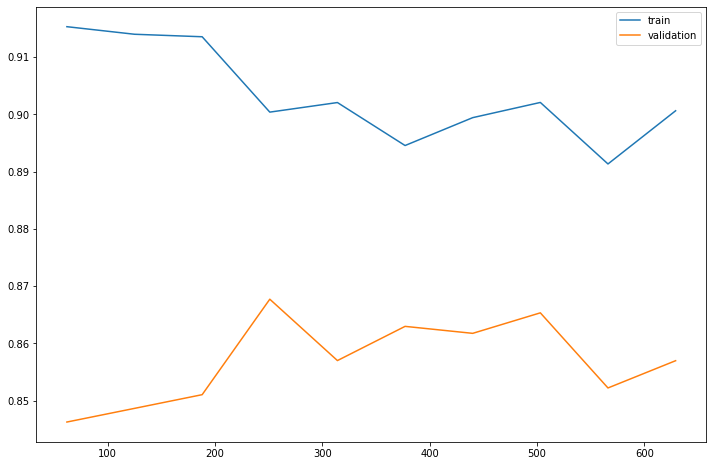

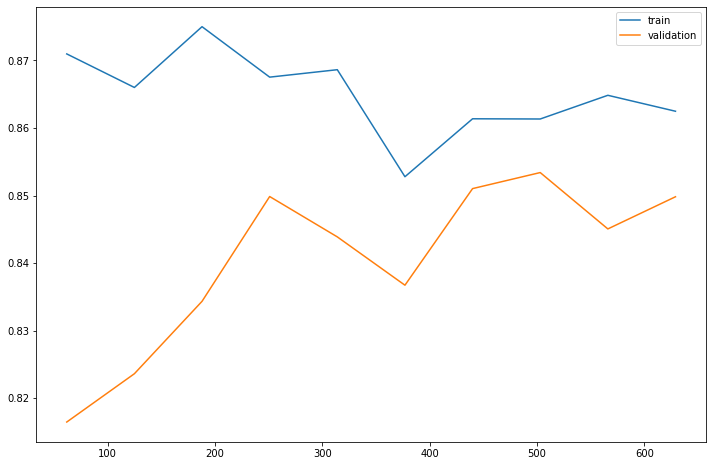

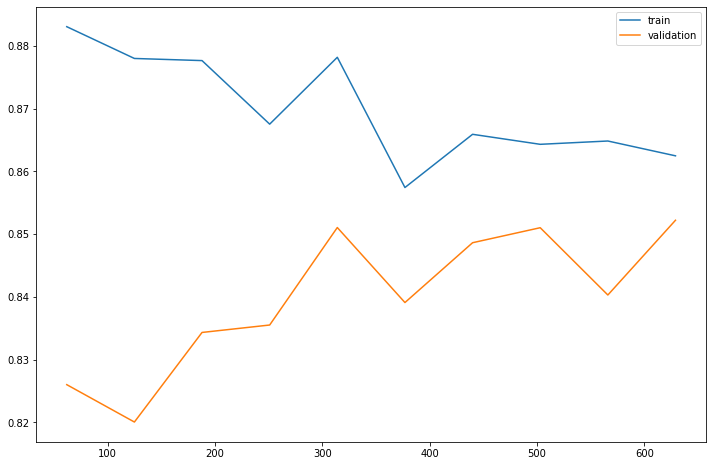

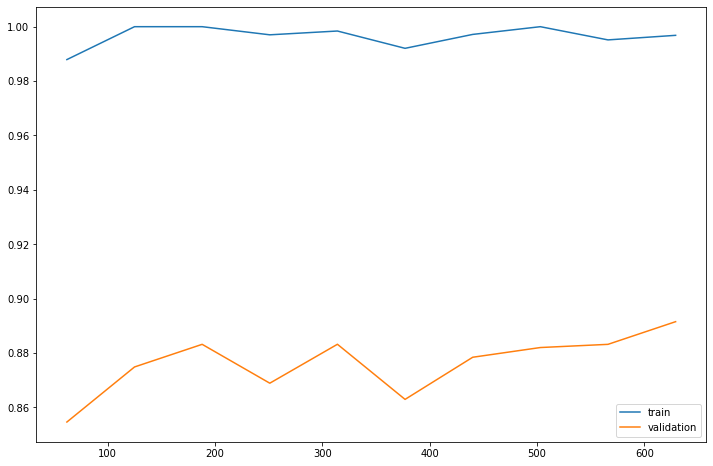

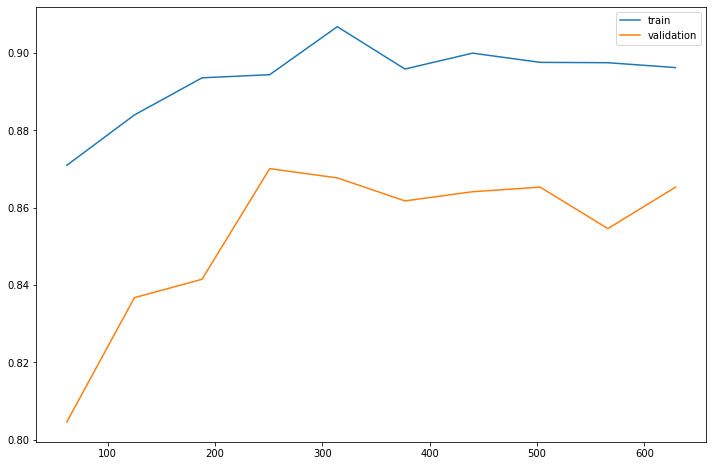

In [34]:
for names,model in dict_of_models.items() :
     print(names)
     evaluation(model)

Optimisation

In [39]:
# SVC semble mieux !!!
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc_3 = SVC()

grid = GridSearchCV(svc_3,parameters)

grid.fit(X_train_3,y_train_3)

print(grid.best_params_)

y_pred_3 = grid.predict(X_test_3)

print(classification_report(y_test_3,y_pred_3))


{'C': 1, 'kernel': 'linear'}
              precision    recall  f1-score   support

           1       0.96      0.97      0.97        74
           2       0.75      0.67      0.71         9
           3       0.95      0.95      0.95        22

    accuracy                           0.94       105
   macro avg       0.89      0.86      0.88       105
weighted avg       0.94      0.94      0.94       105



In [40]:
# logistic
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
grid = GridSearchCV(logreg,grid,cv=10)
grid.fit(X_train_3,y_train_3)


print(grid.best_params_)

y_pred_3 = grid.predict(X_test_3)

print(classification_report(y_test_3,y_pred_3))



/home/congo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/congo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

{'C': 1.0, 'penalty': 'l2'}
              precision    recall  f1-score   support

           1       0.96      0.99      0.97        74
           2       1.00      0.67      0.80         9
           3       0.96      1.00      0.98        22

    accuracy                           0.96       105
   macro avg       0.97      0.88      0.92       105
weighted avg       0.96      0.96      0.96       105



In [41]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9571141709695926


In [46]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train_3,y_train_3)
print("score",logreg2.score(X_test_3,y_test_3))

score 0.9619047619047619


Precision recall

In [45]:
#precision ,recall,threshold =  precision_recall_curve(y_test_3,grid.best_estimator_)

In [44]:
# plt.plot(threshold,precision[::-1], label ='precision')
# plt.plot(threshold,recall[::-1], label ='recall')
# plt.legend()

choix de l'algorithme de sélection

In [143]:
# lees algo de classifications 
logreg_3 = LogisticRegression()
knn_3 = neighbors.KNeighborsClassifier()
svc_3 = LinearSVC()

# ajout de LinearSVC peu etre

In [144]:
# entrainement sur données trains
logreg_3.fit(X_train_3,y_train_3)
knn_3.fit(X_train_3,y_train_3)
svc_3.fit(X_train_3,y_train_3)


LinearSVC()

In [145]:
y_pred_3_scv = svc_3.predict(X_test_3)
print( 'accuracy svc_3' ,metrics.accuracy_score(y_test_3,y_pred_3_scv))

y_pred_3_knn = knn_3.predict(X_test_3)
print( 'accuracy knn_3' ,metrics.accuracy_score(y_test_3,y_pred_3_knn))


y_pred_3_log = logreg_3.predict(X_test_3)
print( 'accuracy log_3' ,metrics.accuracy_score(y_test_3,y_pred_3_log))


accuracy svc_3 0.9904761904761905
accuracy knn_3 0.9142857142857143
accuracy log_3 1.0


feature selection (éliminer les colonnes à faible variance)

In [146]:
# X_valid_3.var(axis = 0).sort_values()

In [147]:
# élemination des colonnes à variances inferieur au seuil 0.1 ou 0.05
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X_valid_3)
colonne_garder = np.array(X_valid_3.columns)[selector.get_support()]

print(colonne_garder)

['Galbant' 'Silhouette' 'Perseverance' 'Rythme' 'Difficulte' 'Rapide'
 'Regulier' 'Equilibre' 'Challenge' 'Progression' 'Accompagnement'
 'Confiance_en_soi' 'Actif' 'Stretchcing' 'Efficacite' 'Discipline'
 'Muscultation' 'Cardio' 'Vital' 'Depassement' 'Calme' 'Serenite' 'Sexy'
 'Plaisir' 'Groupe' 'Partage' 'Role' 'Performance' 'Meilleur'
 'Individualiste' 'detente']


In [148]:
# Autre methode plutot négligeable
 
# define feature selection
# selector = SelectKBest(score_func=f_classif, k=13)  # comment choisir k ?
# apply feature selection
# selector.fit_transform(X_valid_3, y_valid_3)
# colonne_garder = np.array(X_valid_3.columns)[selector.get_support()]

 tester le modèle final

In [149]:
# prediction avec uniquement les colonne garder
X_test_3 = X_test_3[colonne_garder] 
X_train_3 = X_train_3[colonne_garder] 

# print(X_test_3)

In [150]:
# entrainement avec le modele garder 
logreg_3.fit(X_train_3,y_train_3)

LogisticRegression()

In [154]:
y_pred_3_log = logreg_3.predict(X_test_3)
print( 'accuracy log_3' ,metrics.accuracy_score(y_test_3,y_pred_3_knn))

confusion_3 = metrics.confusion_matrix(y_test_3, y_pred_3_knn)
print('confusion  log_3 \n' ,confusion_3)

accuracy log_3 0.9142857142857143
confusion  log_3 
 [[73  0  1]
 [ 7  3  0]
 [ 1  0 20]]


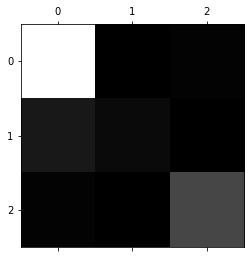

In [155]:
plt.matshow(confusion_3, cmap=plt.cm.gray)
plt.show()